In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np

import pyscisci.all as pyscisci

import matplotlib.pylab as plt

path2aps = '/home/ajgates/APS'

In [2]:
pub2ref  = [[11, 0], [11, 1], [11, 2], [11, 3]]
pub2ref  += [[12, 0], [12, 2], [12, 3]] 
pub2ref  += [[13, 0], [13, 2], [13, 4]]
pub2ref  += [[14, 0]]
pub2ref  += [[15, 0], [15, 2], [15, 3], [15, 4]] # d5 citations
pub2ref  = pd.DataFrame(pub2ref , columns = ['CitingPublicationId', 'CitedPublicationId'])

pub2field  = [[0, 1], [0, 2], [1, 1], [2,3], [3,2], [3,3], [4,3], 
                [11, 1], [12, 3], [13, 3], [14, 1], [15, 1], [15, 2]]
pub2field  = pd.DataFrame(pub2field , columns = ['PublicationId', 'FieldId'])



In [3]:
pub2rs = pyscisci.raostriling_interdisciplinarity(pub2ref , pub2field , 
                                        focus_pub_ids=None, 
                                        pub2field_norm=True, temporal=False,
                                        citation_direction='references', field_distance_metric='cosine', 
                                        distance_matrix=None, show_progress=False)

# first lets look at the field2field distance matrix
pub2rs
# it was formed by 1) making a bipartite matrix of all the reference fields for each of the citing fields
#        Field1, Field2, Field3
# Field1 
# Field2
# Field3
#print(precomputed_distance_matrix)

,RaoStirling,PublicationId
0,0.020387,11
1,0.012410,12
2,0.011382,13
3,0.026113,14
4,0.009458,15


In [4]:
pub2simp = pyscisci.simpson_interdisciplinarity(pub2ref , pub2field , 
                                        focus_pub_ids=None, 
                                        citation_direction='references', 
                                        finite_correction=False, show_progress=False)


pub2simp


,PublicationId,SimpsonInterdisciplinarity
0,11,0.666667
1,12,0.640000
2,13,0.625000
3,14,0.500000
4,15,0.611111


In [5]:
pub2simp = pyscisci.simpson_interdisciplinarity(pub2ref , pub2field , 
                                        focus_pub_ids=None, 
                                        citation_direction='references', 
                                        finite_correction=True, show_progress=False)


pub2simp


,PublicationId,SimpsonInterdisciplinarity
0,11,0.800000
1,12,0.800000
2,13,0.833333
3,14,1.000000
4,15,0.733333


In [6]:
pub2shannon = pyscisci.shannon_interdisciplinarity(pub2ref , pub2field , 
                                        focus_pub_ids=None, 
                                        citation_direction='references', 
                                        normalized=True, K=None, show_progress=False)


pub2shannon


,PublicationId,ShannonInterdisciplinarity
0,11,1.000000
1,12,0.960230
2,13,0.946395
3,14,0.630930
4,15,0.920620


In [3]:
myaps = pyscisci.APS(path2aps)

In [4]:
fieldinfo  = myaps.fieldinfo 
print(fieldinfo ['ClassificationType'].unique())
aps_fields = np.sort(fieldinfo [fieldinfo ['ClassificationType'] == 'disciplines']['FieldId'].unique())
aps_fields

['subjectAreas' 'disciplines' 'concepts']


array(['0213a5a0-0742-43f3-804b-3ccea08a13c0',
       '0e9db8ef-5aa8-40bc-a0c8-9d93f5fcc2eb',
       '0f4313da-ec73-46f5-b24f-521a1fcb6db7',
       '2bd35371-7fda-477a-8e1a-c346c797a232',
       '419d860ece5c42f1b6ad4dee9f4fbf60',
       '510fc21887744547ab09fc6cef0c9a03',
       '512fd433-7b6d-4535-bb60-78f3bf431bc3',
       '5375b253-b0a1-4ece-bb50-4c34ea7218bd',
       '6f025065-4b96-4156-b146-2c285d0994c4',
       '780edcc1-705f-432b-9121-76105d540fe1',
       '88db3168-1ae3-4ee7-a7f8-b83018cc5f17',
       '8ab3d2b7-b50b-460e-b086-8990cfcbd350',
       '9f5c878e-b7b7-4030-bdb9-21a24ad97422',
       'a48f173e-6459-4642-a711-a6e731807625',
       'c3ec1cb0fc2e4669a886a82178c6ceda',
       'c9174048-b368-4b5b-b065-20094708fa4d',
       'e4211828-5d99-4bc4-b986-eb2bbbc8b248'], dtype=object)

In [5]:
pub2field  = myaps.load_pub2field(columns=['PublicationId', 'FieldId'], filter_dict={'FieldId':aps_fields})
pub2ref  = myaps.pub2ref 

pub2year = myaps.pub2year
pub2ref ['CitingYear'] = [pub2year.get(pid, None) for pid in pub2ref ['CitingPublicationId'].values]
pub2ref ['CitedYear'] = [pub2year.get(pid, None) for pid in pub2ref ['CitedPublicationId'].values]
pub2ref .dropna(inplace=True)

In [6]:
distance_matrix = pyscisci.field_citation_distance(pub2ref , pub2field , 
                                       pub2field_norm=True, temporal=True,
                                        citation_direction='references', field_distance_metric='cosine', 
                                        show_progress=False)

focus_pub_ids = np.sort(pub2ref .loc[pub2ref ['CitingYear'] > 2015]['CitingPublicationId'].unique())

pub2rs = pyscisci.raostriling_interdisciplinarity(pub2ref , pub2field , 
                                        focus_pub_ids=focus_pub_ids, 
                                        pub2field_norm=True, temporal=True,
                                        citation_direction='references', field_distance_metric='cosine', 
                                        distance_matrix=distance_matrix, show_progress=False)

In [7]:
pub2rs

,PublicationId,CitingYear,RaoStirling
0,10.1103/PhysRevA.93.012109,2016.0,0.000000
1,10.1103/PhysRevA.93.012121,2016.0,0.207237
2,10.1103/PhysRevA.93.012122,2016.0,0.023904
3,10.1103/PhysRevA.93.012339,2016.0,0.000000
4,10.1103/PhysRevA.93.012506,2016.0,0.000000
...,...,...,...
17927,10.1103/RevModPhys.91.045001,2019.0,0.153758
17928,10.1103/RevModPhys.91.045002,2019.0,0.261487
17929,10.1103/RevModPhys.91.045003,2019.0,0.009303
17930,10.1103/RevModPhys.91.045004,2019.0,0.237865


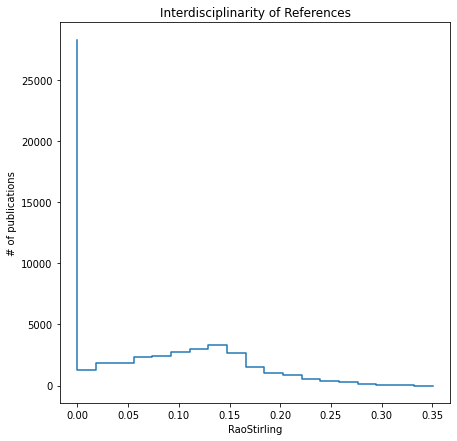

In [8]:
rsdist, rsbins = np.histogram(pub2rs['RaoStirling'].values, bins=20)

fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.step(rsbins[:-1], rsdist)
ax.set_title('Interdisciplinarity of References')
ax.set_xlabel('RaoStirling')
ax.set_ylabel('# of publications')
plt.show()

In [9]:
pub2ref 

,CitingPublicationId,CitedPublicationId,CitingYear,CitedYear
0,10.1103/PhysRevSeriesI.11.215,10.1103/PhysRevSeriesI.1.1,1900.0,1893.0
1,10.1103/PhysRevSeriesI.12.121,10.1103/PhysRevSeriesI.1.166,1901.0,1893.0
2,10.1103/PhysRevSeriesI.7.93,10.1103/PhysRevSeriesI.1.166,1898.0,1893.0
3,10.1103/PhysRevSeriesI.16.267,10.1103/PhysRevSeriesI.2.35,1903.0,1894.0
4,10.1103/PhysRevSeriesI.17.65,10.1103/PhysRevSeriesI.2.112,1903.0,1894.0
...,...,...,...,...
8324608,10.1103/PhysRevLett.123.264802,10.1103/PhysRevLett.123.264803,2019.0,2019.0
8324609,10.1103/PhysRevB.100.224518,10.1103/PhysRevB.100.224519,2019.0,2019.0
8324610,10.1103/PhysRevA.100.062335,10.1103/PhysRevLett.123.260504,2019.0,2019.0
8324613,10.1103/PhysRevLett.123.260504,10.1103/PhysRevA.100.062335,2019.0,2019.0


In [10]:
focus_pub_ids = np.sort(pub2ref .loc[pub2ref ['CitedYear'] > 2015]['CitedPublicationId'].unique())

pub2rs = pyscisci.raostriling_interdisciplinarity(pub2ref , pub2field , 
                                        focus_pub_ids=focus_pub_ids, 
                                        pub2field_norm=True, temporal=False,
                                        citation_direction='citations', field_distance_metric='cosine', 
                                        distance_matrix=None, show_progress=False)

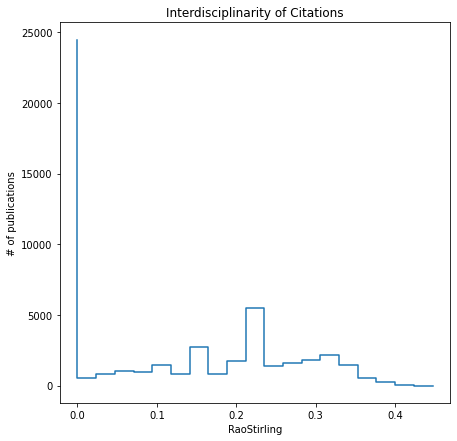

In [11]:
rsdist, rsbins = np.histogram(pub2rs['RaoStirling'].values, bins=20)

fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.step(rsbins[:-1], rsdist)
ax.set_title('Interdisciplinarity of Citations')
ax.set_xlabel('RaoStirling')
ax.set_ylabel('# of publications')
plt.show()